In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import itertools
import networkx as nx
import seaborn  as sns
import pandas   as pd
import sklearn
import numpy    as np
import matplotlib.pyplot as plt

from   platform import python_version
from   sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from   seaborn import load_dataset

from   som import train_SOM, distSq, find_BMU, update_weights

In [4]:
# Dimensions of the SOM grid
m   = 10
n   = 10

# Number of training examples
n_x = 3000

In [5]:
rand = np.random.RandomState(0)

# Initialize the training data, RGB in this case. 
train_data = rand.randint(0, 255, (n_x, 3))

# Initialize the SOM randomly
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)

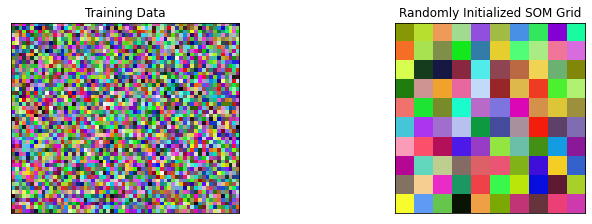

In [6]:
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

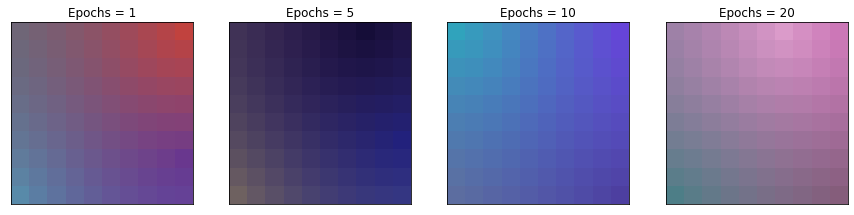

In [7]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

total_epochs = 0

for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM           = train_SOM(SOM, train_data, nepochs=epochs, rand=rand)
    
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

In [8]:
penguins = load_dataset('penguins')
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [9]:
np.unique(penguins['island'], return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([163, 123,  47]))

In [10]:
le = LabelEncoder()

In [11]:
for string in ['island', 'species', 'sex']:
    penguins[string] = le.fit_transform(penguins[string])

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
6,0,2,38.9,17.8,181.0,3625.0,0
7,0,2,39.2,19.6,195.0,4675.0,1
12,0,2,41.1,17.6,182.0,3200.0,0
13,0,2,38.6,21.2,191.0,3800.0,1
14,0,2,34.6,21.1,198.0,4400.0,1


In [12]:
np.unique(penguins['island'], return_counts=True)

(array([0, 1, 2]), array([163, 123,  47]))

In [13]:
# Retain four dimensions.
labels  = ['species_short', 'island', 'sex'] 
scalars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

In [14]:
scaled_penguin_data = StandardScaler().fit_transform(penguins[scalars])
scaled_penguin_data

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [15]:
for i, x in enumerate(scalars):
    penguins[x] = scaled_penguin_data[:,i]

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
4,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
5,0,2,-0.859415,1.747026,-0.783651,-0.692852,1
6,0,2,-0.932669,0.323014,-1.426752,-0.723946,0
7,0,2,-0.877728,1.238450,-0.426373,0.582014,1
12,0,2,-0.529772,0.221299,-1.355296,-1.252549,0
13,0,2,-0.987609,2.052171,-0.712196,-0.506286,1
14,0,2,-1.720150,2.001313,-0.212006,0.239977,1


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/c

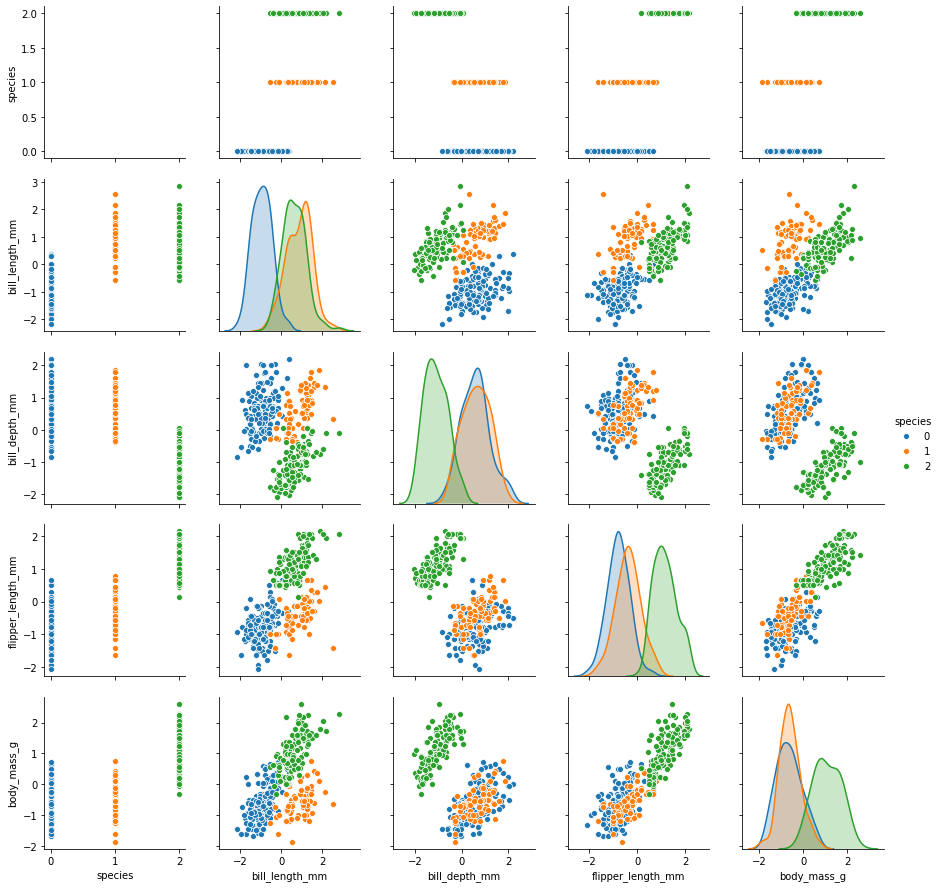

In [16]:
# add SOM as diff colour
x = sns.pairplot(penguins[['species'] + scalars], hue='species')

In [17]:
#training set
train_data = np.array(penguins[scalars])
train_data

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [18]:
# Initialize the SOM randomly
rand = np.random.RandomState(0)
SOM  = rand.normal(loc=0.0, scale=1.0, size=(m, n, 4)).astype(float)
SOM.shape

(10, 10, 4)

In [19]:
SOM[0,0]

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 ])

In [53]:
# update SOM
nvec, zSOM, SOM, rates, radii, lr_decay = train_SOM(SOM, train_data, nepochs=100, rand=rand)

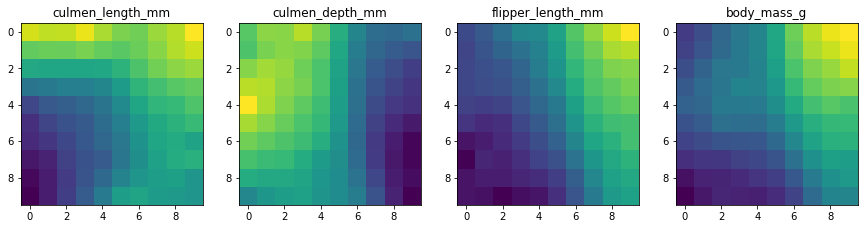

In [55]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5))

for i in range(4):
    ax[i].imshow(SOM[:, :,i])

ax[0].title.set_text('culmen_length_mm')
ax[1].title.set_text('culmen_depth_mm')
ax[2].title.set_text('flipper_length_mm')
ax[3].title.set_text('body_mass_g')

In [56]:
som_df = []

for i in range(10):
    for j in range(10):
        som_df.append(np.concatenate(([3.], SOM[i,j], [i], [j])))

som_df = pd.DataFrame(som_df, columns=['species'] + scalars + ['SOM_I', 'SOM_J'])
som_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,SOM_I,SOM_J
0,3.0,1.217320,0.713195,-0.483415,-0.732083,0.0,0.0
1,3.0,1.121326,0.992814,-0.315851,-0.539679,0.0,1.0
2,3.0,1.138737,0.975626,-0.061295,-0.250142,0.0,2.0
3,3.0,1.309797,1.206348,0.227503,-0.029229,0.0,3.0
4,3.0,1.033423,0.887290,0.262284,0.136039,0.0,4.0
5,3.0,0.838879,0.342370,0.577657,0.576504,0.0,5.0
6,3.0,0.781736,-0.184723,1.056316,1.149556,0.0,6.0
7,3.0,0.965304,-0.494657,1.360990,1.506772,0.0,7.0
8,3.0,1.090410,-0.545167,1.625403,1.735328,0.0,8.0
9,3.0,1.396749,-0.446594,1.858315,1.830509,0.0,9.0


In [57]:
penguins = penguins.append(som_df)
penguins

,SOM_I,SOM_J,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex,species
0,NaN,NaN,0.780732,-0.896042,-0.568475,-1.426752,2.0,1.0,0.0
1,NaN,NaN,0.119584,-0.822788,-0.506286,-1.069474,2.0,0.0,0.0
2,NaN,NaN,0.424729,-0.676280,-1.190361,-0.426373,2.0,0.0,0.0
4,NaN,NaN,1.085877,-1.335566,-0.941606,-0.569284,2.0,0.0,0.0
5,NaN,NaN,1.747026,-0.859415,-0.692852,-0.783651,2.0,1.0,0.0
6,NaN,NaN,0.323014,-0.932669,-0.723946,-1.426752,2.0,0.0,0.0
7,NaN,NaN,1.238450,-0.877728,0.582014,-0.426373,2.0,1.0,0.0
12,NaN,NaN,0.221299,-0.529772,-1.252549,-1.355296,2.0,0.0,0.0
13,NaN,NaN,2.052171,-0.987609,-0.506286,-0.712196,2.0,1.0,0.0
14,NaN,NaN,2.001313,-1.720150,0.239977,-0.212006,2.0,1.0,0.0


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/c

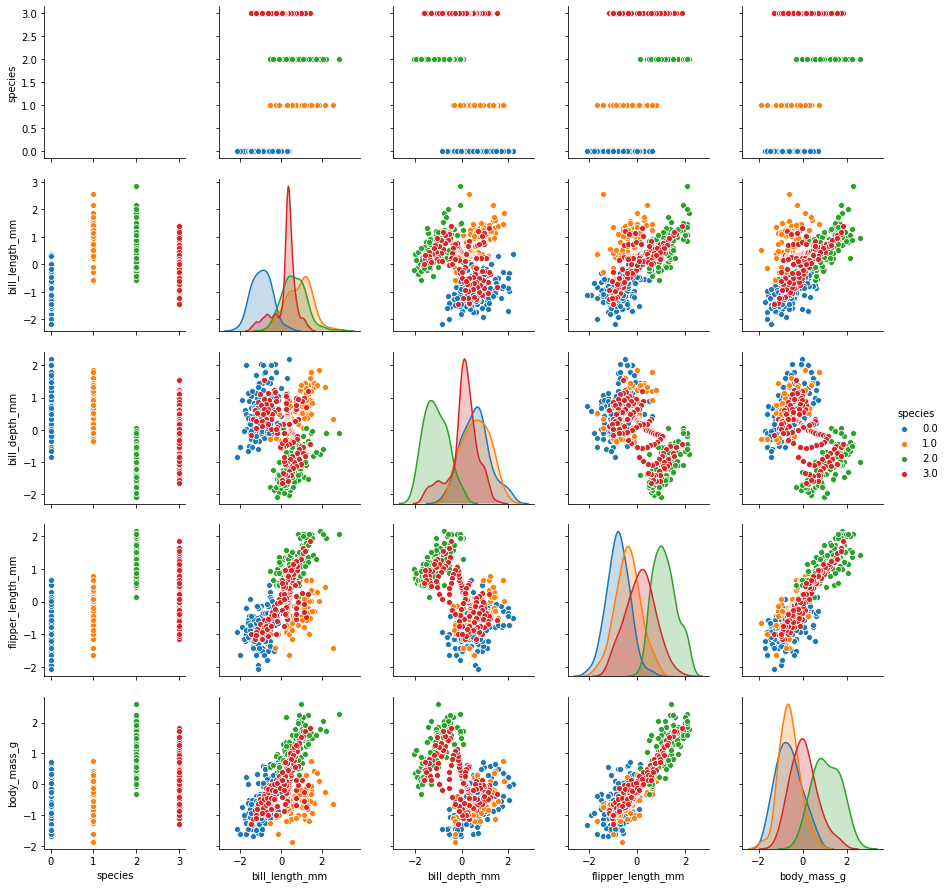

In [58]:
g = sns.pairplot(penguins[['species'] + scalars], hue='species')

In [59]:
real_penguins = penguins[penguins['species'] > -1.]
som_penguins  = penguins[penguins['species'] == -1.]

In [60]:
G = nx.Graph()

In [61]:
for i, row in enumerate(real_penguins):    
    G.add_node(i, **dict(real_penguins.iloc[i]))

In [62]:
G.nodes[0]

{'SOM_I': nan,
 'SOM_J': nan,
 'bill_depth_mm': 0.7807321043966328,
 'bill_length_mm': -0.8960418897725922,
 'body_mass_g': -0.5684747832140795,
 'flipper_length_mm': -1.4267515672137063,
 'island': 2.0,
 'sex': 1.0,
 'species': 0.0}

In [63]:
uislands = np.unique(penguins['island'])
uislands

array([ 0.,  1.,  2., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [64]:
for island in [0., 1., 2.]:
    idx = penguins.index[penguins['island'] == island].values
    
    edges = list(itertools.combinations(idx, 2))
    
    G.add_edges_from(edges)

In [65]:
# pos = np.c_[penguins['bill_depth_mm'], penguins['bill_length_mm']]

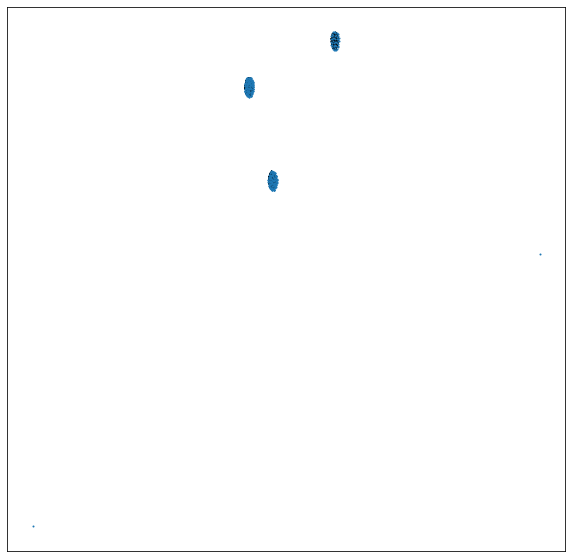

In [66]:
ubax1 = plt.subplots(1, 1, figsize=(10,10))

# keywords:  nx.draw_networkx?
nx.draw(G, with_labels=False, font_weight='bold', font_color='k', node_size=1, width=0.1)

limits = plt.axis('on')

In [63]:
# nx.draw_networkx?

# Done.